In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [37]:
# Load dataset
file_path = 'D:\Tugas Akhir\Stroke\data_setelah_penghapusan_dan_urutan.csv'
df = pd.read_csv(file_path)

# Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [38]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()
# Tampilkan output
print("Frekuensi nilai unik dalam kolom 'stroke':")
print(stroke_counts)

Frekuensi nilai unik dalam kolom 'stroke':
stroke
0    3481
1      30
Name: count, dtype: int64


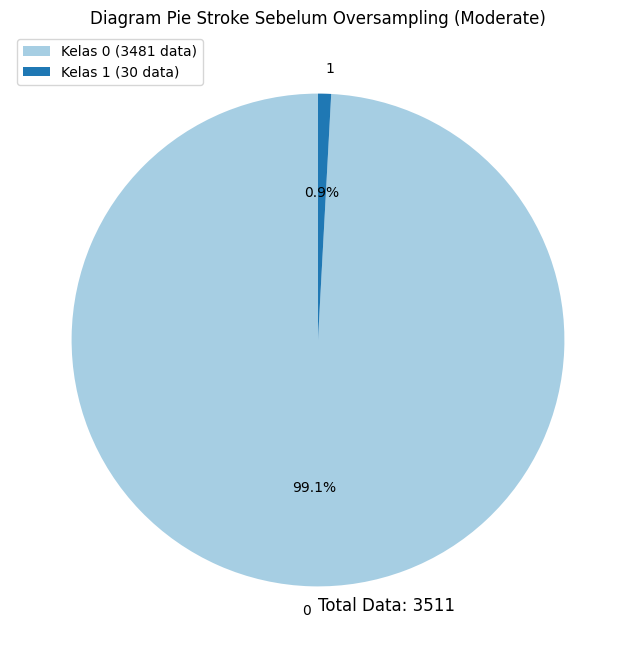

In [40]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Berikan judul
plt.title('Diagram Pie Stroke Sebelum Oversampling (Moderate)')

# Tambahkan keterangan legend
legend_labels = [f'Kelas {label} ({count} data)' for label, count in zip(stroke_counts.index, stroke_counts)]
plt.legend(legend_labels, loc='upper left')

# Tambahkan keterangan total data
total_data = len(df['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='left')

# Tampilkan diagram
plt.show()


In [41]:
# Langkah 1: Pilih sampel minoritas
minority_class = X[y == 1]

# Tampilkan jumlah sampel minoritas
print("Jumlah Sampel Minoritas (Stroke=1):", len(minority_class))


Jumlah Sampel Minoritas (Stroke=1): 30


In [42]:
print(df.dtypes)

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
work_type_Govt_job                  int64
work_type_Private                   int64
work_type_Self-employed             int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_Unknown              int64
smoking_status_formerly smoked      int64
smoking_status_never smoked         int64
smoking_status_smokes               int64
stroke                              int64
dtype: object


Hasil Perhitungan Jarak:
Distances:
[[0.         1.34717881]
 [0.         1.34783009]
 [0.         1.58435301]
 ...
 [1.27547034 1.28621048]
 [0.25563282 1.03715808]
 [1.05976596 1.08220923]]
Indices:
[[ 0 14]
 [ 1 14]
 [ 2 27]
 ...
 [ 8  3]
 [29 17]
 [23 19]]


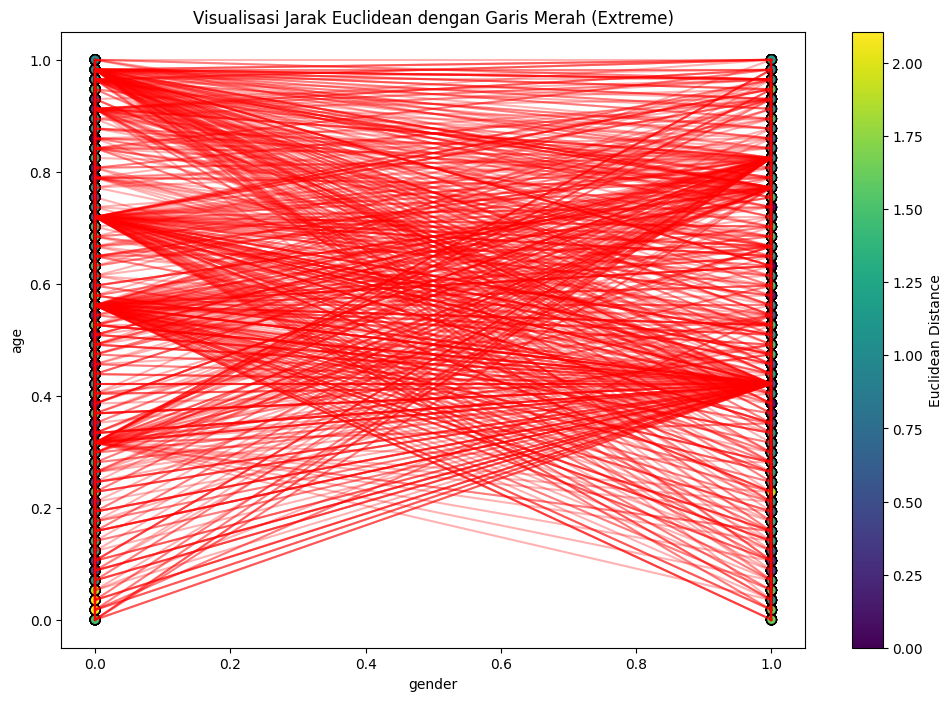

In [43]:
from sklearn.neighbors import NearestNeighbors

# Langkah 2: Hitung Jarak
nn = NearestNeighbors(n_neighbors=2, metric='euclidean')
nn.fit(minority_class)
distances, indices = nn.kneighbors(X)

# Tampilkan hasil perhitungan jarak
print("Hasil Perhitungan Jarak:")
print("Distances:")
print(distances)
print("Indices:")
print(indices)

import matplotlib.pyplot as plt

# Visualisasi Scatter Plot dengan Garis
plt.figure(figsize=(12, 8))

# Scatter plot dengan warna marker berdasarkan jarak
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=distances[:, 0], cmap='viridis', edgecolors='k', s=50)

# Menambahkan garis merah yang menghubungkan setiap sampel dengan dua tetangganya
for i in range(len(X)):
    plt.plot([X.iloc[i, 0], X.iloc[indices[i, 0], 0]], [X.iloc[i, 1], X.iloc[indices[i, 0], 1]], 'r-', alpha=0.3)

# Menambahkan colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Euclidean Distance')

# Menambahkan label dan judul
plt.xlabel(X.columns[0])  # Nama kolom fitur 1
plt.ylabel(X.columns[1])  # Nama kolom fitur 2
plt.title('Visualisasi Jarak Euclidean dengan Garis Merah (Extreme)')

# Tampilkan diagram
plt.show()


In [44]:
# Langkah 3: Hitung Rasio
ratio = len(X[y == 0]) / len(minority_class)
print("Rasio antara kelas mayoritas dan kelas minoritas:", ratio)


Rasio antara kelas mayoritas dan kelas minoritas: 116.03333333333333


In [45]:
# Langkah 4: Hitung Rasio ADASYN
desired_ratio = 0.65  
raw_adasyn_ratio = min((desired_ratio / ratio, 1.0))  
adasyn_ratio = max(raw_adasyn_ratio - 0.01, 0.65)  
print("Jumlah Sampel Minoritas :", len(minority_class))
print("Desired Ratio (Rasio yang diinginkan):", desired_ratio)
print("ADASYN Ratio (Rasio yang digunakan untuk ADASYN):", adasyn_ratio)

Jumlah Sampel Minoritas : 30
Desired Ratio (Rasio yang diinginkan): 0.65
ADASYN Ratio (Rasio yang digunakan untuk ADASYN): 0.65


In [46]:
# Langkah 5: Buat Sampel Sintetis (solusi alternatif)
# Tampilkan jumlah sampel minoritas sebelum oversampling
print("Jumlah Sampel Minoritas Sebelum Oversampling (Stroke=1):", len(y[y == 1]))

# Oversampling menggunakan ADASYN tanpa batasan
adasyn = ADASYN(sampling_strategy=adasyn_ratio, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Tampilkan jumlah sampel minoritas setelah oversampling
print("Jumlah Sampel Minoritas Setelah Oversampling (Stroke=1):", sum(y_resampled == 1))

Jumlah Sampel Minoritas Sebelum Oversampling (Stroke=1): 30
Jumlah Sampel Minoritas Setelah Oversampling (Stroke=1): 2250


In [47]:
# Langkah 7: Gabungkan Sampel Sintetis dengan Dataset Asli
oversampled_data = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_labels = pd.Series(y_resampled, name='stroke')

# Verifikasi jumlah sampel setelah oversampling
jumlah_sampel_data_asli = len(X)
jumlah_sampel_sintetis = len(X_resampled) - len(X)
jumlah_sampel_setelah_oversampling = len(oversampled_data)

print("Jumlah Sampel Data Asli:", jumlah_sampel_data_asli)
print("Jumlah Sampel Sintetis:", jumlah_sampel_sintetis)
print("Jumlah Sampel Setelah Oversampling:", jumlah_sampel_setelah_oversampling)
# Batasi kolom 'age', 'avg_glucose_level', dan 'bmi' menjadi 4 angka di belakang koma
columns_to_limit = ['age', 'avg_glucose_level', 'bmi']
oversampled_data[columns_to_limit] = oversampled_data[columns_to_limit].round(4)


Jumlah Sampel Data Asli: 3511
Jumlah Sampel Sintetis: 2220
Jumlah Sampel Setelah Oversampling: 5731


In [48]:
oversampled_data

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0.8596,1,1,1,0,1,0,1,0.0687,0.3326,0,0,1,0
1,1,0.9825,1,0,1,0,1,0,1,0.1164,0.3802,0,0,1,0
2,0,1.0000,0,1,1,0,1,0,1,0.7070,0.4380,1,0,0,0
3,0,0.9649,0,0,1,0,0,1,1,0.2258,0.2521,0,0,1,0
4,1,0.4211,0,0,1,0,1,0,0,0.0263,0.3843,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,0,0.8097,0,0,1,0,1,0,1,0.6849,0.4559,0,0,0,0
5727,0,0.5628,0,0,1,0,1,0,1,0.6574,0.4807,0,1,0,0
5728,0,0.5755,0,0,1,0,1,0,1,0.6690,0.4934,0,1,0,0
5729,0,0.7962,0,0,1,0,1,0,1,0.6834,0.4572,0,0,0,0


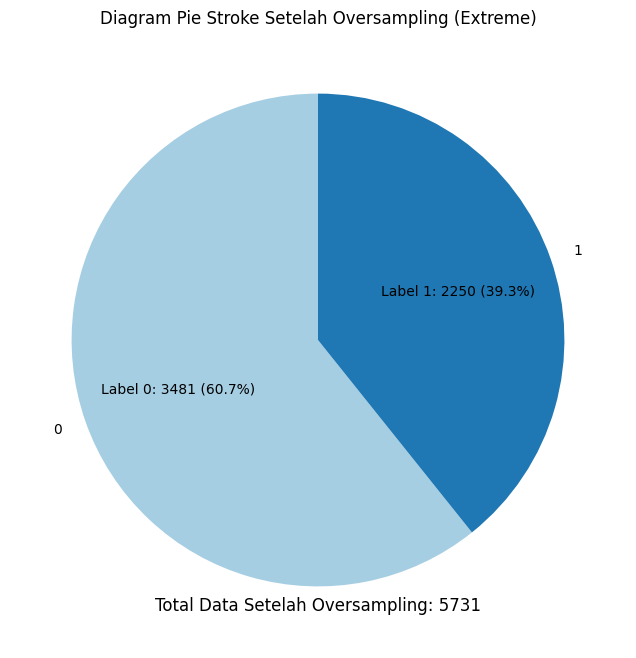

In [49]:
# Hitung frekuensi nilai unik dalam kolom 'stroke' setelah oversampling
oversampled_stroke_counts = oversampled_labels.value_counts()

# Plotting diagram pie untuk kolom 'stroke' setelah oversampling
plt.figure(figsize=(8, 8))
pie_chart, _, autotexts = plt.pie(oversampled_stroke_counts, labels=oversampled_stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops=dict(color="black"))

# Tambahkan keterangan total data setelah oversampling
total_data_oversampled = len(oversampled_labels)
plt.text(0, -1.1, f'Total Data Setelah Oversampling: {total_data_oversampled}', fontsize=12, ha='center')

# Tambahkan keterangan jumlah data pada label 0 pada legenda
label_0_count = oversampled_stroke_counts[0]
autotexts[0].set_text(f'Label 0: {label_0_count} ({oversampled_stroke_counts[0]/total_data_oversampled*100:.1f}%)')

# Tambahkan keterangan jumlah data pada label 1 pada legenda
label_1_count = oversampled_stroke_counts[1]
autotexts[1].set_text(f'Label 1: {label_1_count} ({oversampled_stroke_counts[1]/total_data_oversampled*100:.1f}%)')

# Berikan judul
plt.title('Diagram Pie Stroke Setelah Oversampling (Extreme)')

# Tampilkan diagram setelah oversampling
plt.show()


In [32]:
# Hitung jumlah data pada stroke 0 dan stroke 1 setelah oversampling
jumlah_data_stroke_0 = oversampled_labels.value_counts()[0]
jumlah_data_stroke_1 = oversampled_labels.value_counts()[1]

# Tampilkan jumlah data pada stroke 0 dan stroke 1
print("Jumlah Data Stroke 0 Setelah Oversampling:", jumlah_data_stroke_0)
print("Jumlah Data Stroke 1 Setelah Oversampling:", jumlah_data_stroke_1)

Jumlah Data Stroke 0 Setelah Oversampling: 3481
Jumlah Data Stroke 1 Setelah Oversampling: 2250


In [33]:
import shutil

# Langkah 8: Gabungkan DataFrame fitur dan label target
oversampled_data_with_labels = pd.concat([oversampled_data, oversampled_labels], axis=1)

# Langkah 9: Simpan DataFrame ke dalam file CSV dengan label target
output_file_path = 'D:\\Tugas Akhir\\Stroke\\data_oversampled_extreme.csv'
oversampled_data_with_labels.to_csv(output_file_path, index=False, decimal=',')

# Langkah 10: Konfirmasi penyimpanan
print(f"DataFrame setelah oversampling telah disimpan di: {output_file_path}")

# (Opsional) Langkah 11: Pindahkan file ke lokasi yang diinginkan
destination_path = 'D:\\Tugas Akhir\\Stroke\\data_oversampled_extreme.csv'
shutil.move(output_file_path, destination_path)

# Konfirmasi pemindahan
print(f"File telah dipindahkan ke: {destination_path}")


DataFrame setelah oversampling telah disimpan di: D:\Tugas Akhir\Stroke\data_oversampled_extreme.csv
File telah dipindahkan ke: D:\Tugas Akhir\Stroke\data_oversampled_extreme.csv


In [34]:
oversampled_data_with_labels

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
2,0,0.8596,1,1,1,0,1,0,1,0.0687,0.3326,0,0,1,0,1
3,1,0.9825,1,0,1,0,1,0,1,0.1164,0.3802,0,0,1,0,1
4,1,0.4386,1,0,1,0,0,1,1,0.5182,0.4050,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,0,0.9322,0,0,1,0,0,1,1,0.5251,0.3395,0,0,0,0,1
5727,0,0.9124,0,0,1,0,0,1,0,0.4925,0.4394,0,0,0,0,1
5728,0,0.9134,0,0,1,0,0,1,0,0.4806,0.4331,0,0,0,0,1
5729,0,0.9311,0,0,1,0,0,1,1,0.5234,0.3450,0,0,0,0,1


<Axes: >

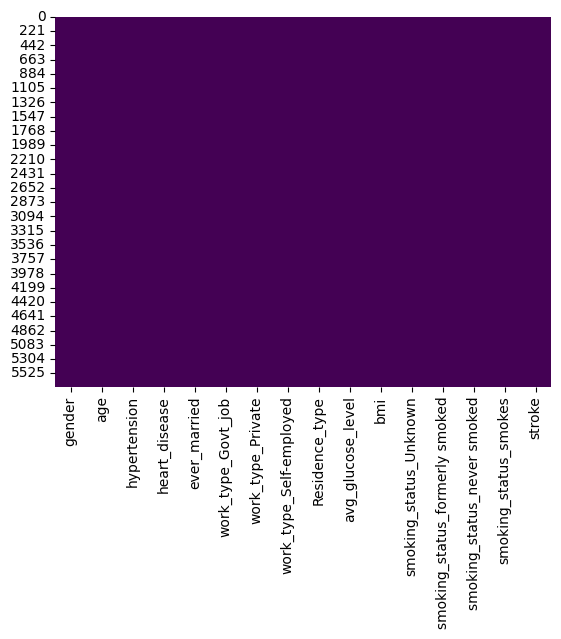

In [35]:
import seaborn as sns
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(oversampled_data_with_labels.isnull(), cbar=False, cmap='viridis')